<a href="https://colab.research.google.com/github/Vishva-23/Analyze-and-visualize-data-on-Kaggle/blob/main/HousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [223]:
df=pd.read_csv('/content/train.csv')

In [224]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [225]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-226-e39e1c1ec86b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.9});


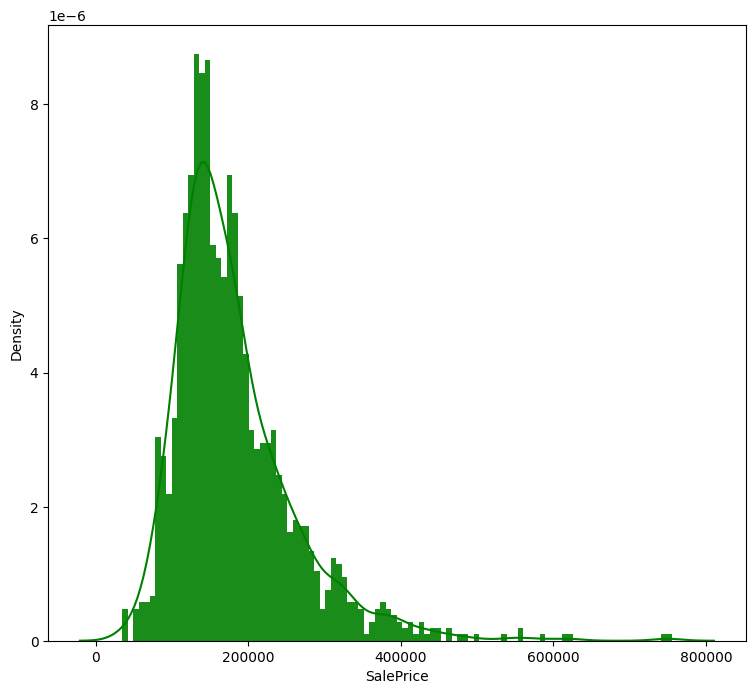

In [226]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.9});


In [227]:
num_df = df.select_dtypes(include=['number'])
num_df.head(6)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000


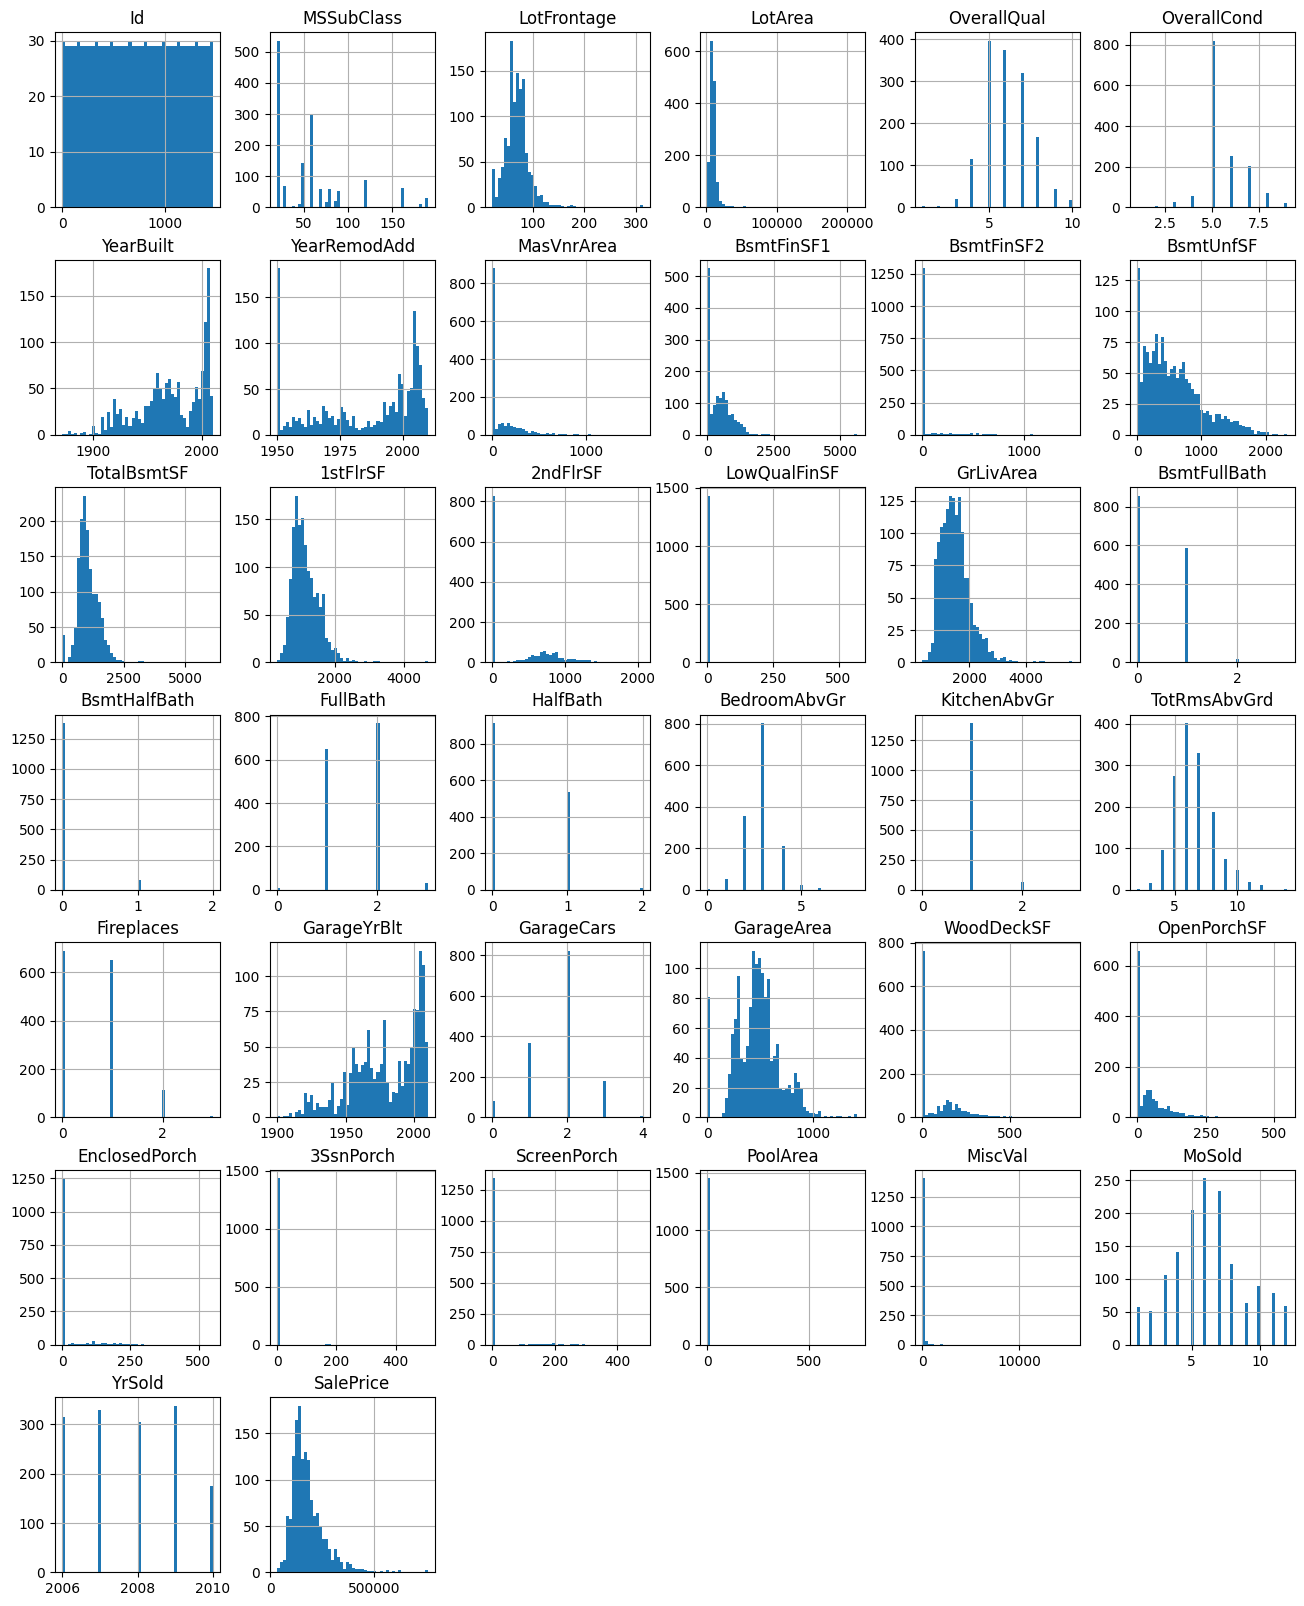

In [228]:
num_df.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10);


In [229]:
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [230]:
df["PoolQC"] =df["PoolQC"].fillna("No")
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [231]:
df.drop(["MiscFeature"], axis = 1, inplace=True)


In [232]:
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)


Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [233]:
df['Alley'].unique()
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [234]:
df["Alley"] = df["Alley"].fillna("No")
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

In [235]:
df["Fence"] = df["Fence"].fillna("No")
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [236]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,0,12,2008,WD,Normal,250000


In [237]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("No")
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [238]:
df["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [239]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].mode()[0])
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [240]:
df["GarageType"].unique()
df["GarageType"].value_counts()


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [241]:
df.drop("GarageType",axis=1,inplace=True)
df.drop("GarageYrBlt",axis=1,inplace=True)
df.drop("GarageFinish",axis=1,inplace=True)
df.drop("GarageQual",axis=1,inplace=True)
df.drop("GarageCond",axis=1,inplace=True)
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [242]:
df.drop("BsmtQual", axis=1, inplace=True)
df.drop("BsmtCond", axis=1, inplace=True)
df.drop("BsmtExposure", axis=1, inplace=True)
df.drop("BsmtFinType1", axis=1, inplace=True)
df.drop("BsmtFinSF1", axis=1, inplace=True)
df.drop("BsmtFinType2", axis=1, inplace=True)
df.drop("BsmtFinSF2", axis=1, inplace=True)
df.drop("BsmtUnfSF", axis=1, inplace=True)
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64

In [243]:
df.dropna(inplace=True)
nan_values = df.isna().sum()
nan_values[nan_values != 0].sort_values(ascending=False)

Series([], dtype: int64)

In [244]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

<ipython-input-244-f81cb2d3173d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)


In [245]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


In [246]:
X = pd.get_dummies(X, columns=cat_cols)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8323996897434642
